#Machine Learning - KNN e Árvore de Decisão

Este projeto é uma continuação de "Flai 2 - ML Regressão (Regressão Linear)". Faremos a previsão dos custos de plano de saúde de novos clientes (variável **charges**, ou custos) com base em informações obtidas de clientes anteriores (variáveis **ibm**, ou IMC, e **smoker**, ou fumantes) utilizando dois outros algoritmos de regressão: o KNN e a Árvore de Decisão

Entenderemos como otimizar os parâmetros dos modelos estudados com base no valor de seus Erros Quadráticos Médios, verificando também como eles se comportam quando alimentados com uma ou duas variáveis. Ao final, vamos comparar cada um dos melhores modelos e verificar qual deles fez a melhor previsão em relação aos demais.


Utilizaremos:
*   Modelo: KNN e Árvore de Decisão
*   Método de Validação: Holdout Repetido
*   Métrica: Erro Quadrático Médio



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

##Pré-Processamento dos Dados

Após a importação dos dados, é precisa fazer uma análise exploratória para conhecer melhor as variáveis. Feita a análise dos dados, processamos os dados para que eles possam ser adequadamente utilizados nos modelos. A análise exploratória e explicação do pré-processamento estão em "Flai 2 - ML Regressão (Regressão Linear)" 

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'

dados = pd.read_csv(url)

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
dados['charges'] = dados['charges']/1000

In [ ]:
dados = dados[['bmi','smoker','charges']]

##Definição das Variáveis

Definimos quais as variáveis explicativas X (neste cenário apenas **bmi**) serão usadas para encontrar a variável resposta y (neste projeto, **charges**)

In [ ]:
X = dados['bmi'].values.reshape(-1,1)
y = dados['charges']

##Validação Holdout Repetido

Para este projeto, utilizaremos a validação de Holdout repetido, em que fazemos a validação Holdout, ajustamos o modelo e fazemos a previsão repetidamente, calculando o Erro Quadrático Médio para cada repetição. Ao final, calcula-se a média dos EQMs. Assim, obtemos um valor mais estável para o EQM do que obtivemos anteriormente com um único Holdout

In [ ]:
def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  eqms = []

  for i in range(replicas):
    Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = proporcao)

    reg = modelo
    reg.fit(Xtreino, ytreino)
    
    preditos = reg.predict(Xteste)

    eqm = mean_squared_error(yteste, preditos)
    eqms.append(eqm)

  res = np.array(eqms).mean().round(2)

  print(f'EQM médio: {res}')

  return res

Para fazermos a representação gráfica dos modelos com valores de EQM mais próximos do EQM médio encontrado com o Holdout repetido, fazemos também um Holdout simples

In [ ]:
from sklearn.model_selection import train_test_split
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

##Modelos de Regressão

###KNN

O modelo do KNN, ou K-Nearest Neighbors (do inglês, K-Vizinhos Mais Próximos), faz sua previsão com base na estimação do valor de uma nova observação por meio do cálculo da média das observações mais próximas a ela

AVALIAÇÃO DO MODELO

Para avaliar o modelo, utilizamos a função HoldoutRep escrita em "Validação Holdout Repetido", determinando qual modelo será utilizado, quais seus parâmetros a serem considerados e o número de vezes em que iremos calcular o Erro Quadrático Médio. Ao final, a função nos retorna a média dos EQMs encontrados

In [ ]:
k=5
HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = k), replicas = 100)

EQM médio: 170.18


170.18

REPRESENTAÇÃO GRÁFICA DO MODELO

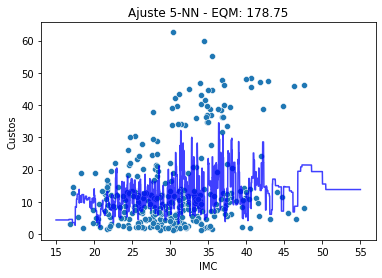

In [ ]:
knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)
preditos_k = knnreg.predict(Xteste)
eqm_knn = mean_squared_error(yteste, preditos_k)

x = np.arange(15, 55, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))

sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title(f'Ajuste {k}-NN - EQM: {eqm_knn:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

###Árvore de Decisão

A Árvore de Decisão é um algoritmo que particiona o conjunto de dados de forma a criar as partições mais homogêneas possíveis, tirando a média dos valores das partições finais como variável resposta

AVALIAÇÃO DO MODELO

Para avaliar o modelo, utilizamos a função HoldoutRep escrita em "Validação Holdout Repetido", determinando qual modelo será utilizado, quais seus parâmetros e o número de vezes em que iremos calcular o Erro Quadrático Médio. Ao final, a função nos retorna a média dos EQMs encontrados

In [ ]:
profundidade = 1
HoldoutRep(modelo = DecisionTreeRegressor(max_depth = profundidade), replicas = 100)

EQM médio: 141.33


141.33

REPRESENTAÇÃO GRÁFICA DO MODELO

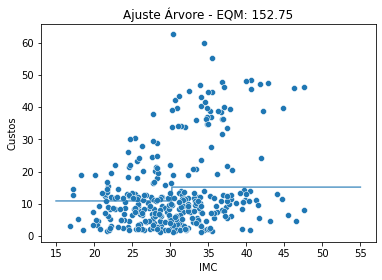

In [ ]:
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)
preditos_a = arvore.predict(Xteste)
eqm_arvore = mean_squared_error(yteste, preditos_a)

x = np.arange(15, 55, 0.01)
y0 = arvore.predict(x.reshape(-1, 1))

sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, alpha = 0.75)
plt.title(f'Ajuste Árvore - EQM: {eqm_arvore:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custos')

plt.show()

Podemos visualizar as partições feitas pela árvore:

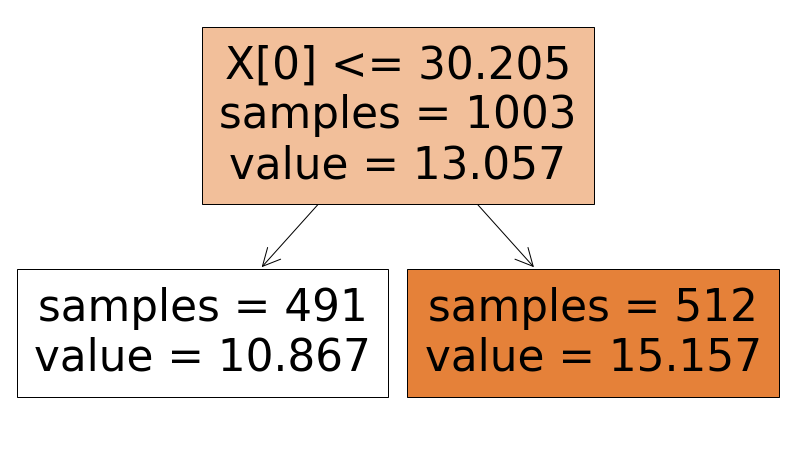

In [ ]:
plt.figure(figsize = (14, 8))
plot_tree(arvore, filled = True, proportion = False, impurity = False)
plt.show()

#Achando o Melhor Modelo

Com base nos conhecimentos anteriores, podemos buscar o melhor ajuste para os modelos de KNN e Árvore de Decisão, ou seja, o valor para seus parâmetros que retorna o menor valor de EQM. Para isso, levamos em conta dois cenários: o primeiro, utiliza apenas a variável **bmi** para prever **charges**. Já o segundo, utiliza as variáveis **bmi** e **smoker** para prever **charges**

###Cenário 1: Considerando Apenas a Variável **bmi**

In [ ]:
X = dados['bmi'].values.reshape(-1,1)
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

####O Melhor KNN do Cenário 1


Repetimos o modelo de KNN 200 vezes, a cada vez incrementando em uma unidade o número de vizinhos levados em conta no cálculo da média. Prevemos com o modelo ajustado e calculamos o EQM para cada repetição. Ao final, o algoritmo retorna o melhor ajuste k e o valor do EQM calculado quando o utilizamos

In [ ]:
reps = 200
eqms_knn = []

for i in range(1, reps + 1):
  knnreg = KNeighborsRegressor(n_neighbors = i)
  knnreg.fit(Xtreino, ytreino)

  preditos_knn = knnreg.predict(Xteste)
  
  eqm_knn = mean_squared_error(yteste, preditos_knn)
  eqms_knn.append(eqm_knn)


melhor_knn_k = eqms_knn.index(min(eqms_knn))+1
melhor_knn_eqm = round(min(eqms_knn), 2)

print(f'O melhor modelo foi {melhor_knn_k}-NN com EQM = {melhor_knn_eqm}')

O melhor modelo foi 34-NN com EQM = 157.91


Utilizamos o melhor k para ajustar o modelo a ser utilizado no Holdout repetido e encontrar um valor mais estável para o EQM

In [ ]:
eqm_reps_knn = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = melhor_knn_k), replicas = 100)

EQM médio: 142.4


O resultado do KNN tem a seguinte representação gráfica:

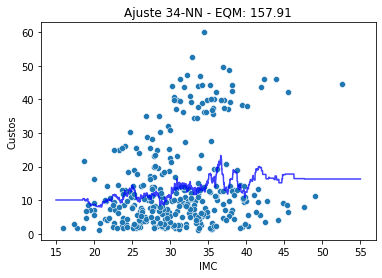

In [ ]:
knnreg = KNeighborsRegressor(n_neighbors = melhor_knn_k)
knnreg.fit(Xtreino, ytreino)
preditos_k = knnreg.predict(Xteste)
eqm_knn = mean_squared_error(yteste, preditos_k)

x = np.arange(15, 55, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))

sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title(f'Ajuste {melhor_knn_k}-NN - EQM: {eqm_knn:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

####A Melhor Árvore do Cenário 1

Repetimos o modelo da árvore 10 vezes, a cada vez incrementando em uma unidade o número de partições feitas no conjunto de dados. Repetimos um número baixo de vezes pois o modelo de árvore é altamente sensível a overfitting, ou seja, a captar as particulares do conjunto usado e que prejudicam a fazer previsões. Prevemos com o modelo ajustado e calculamos o EQM para cada repetição. Ao final, o algoritmo retorna o melhor número de repartições e o valor do EQM calculado quando o utilizamos

In [ ]:
reps = 10
eqms_arvore = []

for i in range(1, reps + 1):
  arvore = DecisionTreeRegressor(max_depth = i)
  arvore.fit(Xtreino, ytreino)

  preditos_arvore = arvore.predict(Xteste)
  
  eqm_arvore = mean_squared_error(yteste, preditos_arvore)
  eqms_arvore.append(eqm_arvore)


melhor_arvore_depth = eqms_arvore.index(min(eqms_arvore))+1
melhor_arvore_eqm = round(min(eqms_arvore), 2)

print(f'O melhor modelo foi Profundidade {melhor_arvore_depth} com EQM = {melhor_arvore_eqm}')

O melhor modelo foi Profundidade 2 com EQM = 160.59


Utilizamos a melhor profundidade para ajustar o modelo a ser utilizado no Holdout repetido e encontrar um valor mais estável para o EQM

In [ ]:
eqm_reps_arvore = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = melhor_arvore_depth), replicas = 100)

EQM médio: 143.91


O resultado da árvore de decisão tem a seguinte representação gráfica:

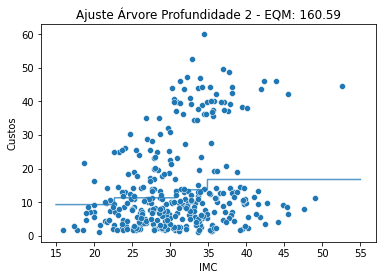

In [ ]:
arvore = DecisionTreeRegressor(max_depth = melhor_arvore_depth)
arvore.fit(Xtreino, ytreino)
preditos_a = arvore.predict(Xteste)
eqm_arvore = mean_squared_error(yteste, preditos_a)

x = np.arange(15, 55, 0.01)
y0 = arvore.predict(x.reshape(-1, 1))

sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, alpha = 0.75)
plt.title(f'Ajuste Árvore Profundidade {melhor_arvore_depth} - EQM: {eqm_arvore:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custos')

plt.show()

Podemos visualizar as partições feitas pela árvore:

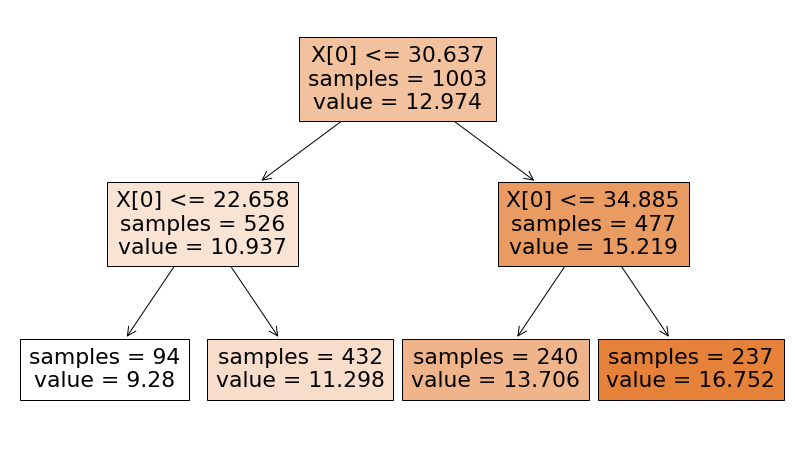

In [ ]:
plt.figure(figsize = (14, 8))
plot_tree(arvore, filled = True, proportion = False, impurity = False)
plt.show()

####Regressão Linear do Cenário 1

Apesar de não ter um parâmetro a ser otimizado, podemos prever também a variável **charges** com uma regressão linear e comparar seu EQM médio ao melhor EQM dos modelos otimizados anteriormente

In [ ]:
eqm_reps_reg = HoldoutRep(modelo = LinearRegression(), replicas = 100)

EQM médio: 143.72


O resultado da regressão linear tem a seguinte representação gráfica:

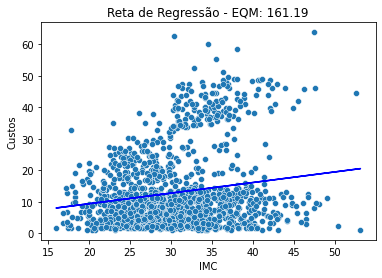

In [ ]:
reg = LinearRegression()
reg.fit(Xtreino, ytreino)
preditos = reg.predict(Xteste)
eqm_reg = mean_squared_error(yteste, preditos)

b0 = reg.intercept_
b1 = reg.coef_

x = np.arange(15, 55, 0.01)
y0 = b0+b1*X

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(X, y0, color = 'blue')
plt.title(f'Reta de Regressão - EQM: {eqm_reg:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

###Cenário 2: Considerando as Variáveis **bmi** e **smoker**

Definimos novamente as variáveis, dessa vez adicionando a variável **smoker** à análise. Particionamos os dados e seguimos, para cada modelo, os mesmos passos que anteriormente

In [ ]:
X1 = dados[['bmi', 'smoker']]
y1 = dados['charges']

In [ ]:
Xtreino1, Xteste1, ytreino1, yteste1 = train_test_split(X1, y1, test_size = 0.25)

In [ ]:
def HoldoutRep1(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  eqms = []

  for i in range(replicas):
    Xtreino1, Xteste1, ytreino1, yteste1 = train_test_split(X1, y1, test_size = proporcao)

    reg = modelo
    reg.fit(Xtreino1, ytreino1)
    
    preditos1 = reg.predict(Xteste1)

    eqm = mean_squared_error(yteste1, preditos1)
    eqms.append(eqm)

  res = np.array(eqms).mean().round(2)

  print(f'EQM médio: {res}')

  return res

####O Melhor KNN do Cenário 2

In [ ]:
reps = 200
eqms_knn1 = []

for i in range(1, reps + 1):
  knnreg1 = KNeighborsRegressor(n_neighbors = i)
  knnreg1.fit(Xtreino1, ytreino1)

  preditos_knn1 = knnreg1.predict(Xteste1)
  
  eqm_knn1 = mean_squared_error(yteste1, preditos_knn1)
  eqms_knn1.append(eqm_knn1)


melhor_knn1_k = eqms_knn1.index(min(eqms_knn1))+1
melhor_knn1_eqm = round(min(eqms_knn1), 2)

print(f'O melhor modelo foi {melhor_knn1_k}-NN com EQM = {melhor_knn1_eqm}')

O melhor modelo foi 5-NN com EQM = 48.15


In [ ]:
eqm_reps_knn1 = HoldoutRep1(modelo = KNeighborsRegressor(n_neighbors = melhor_knn1_k), replicas = 100)

EQM médio: 47.34


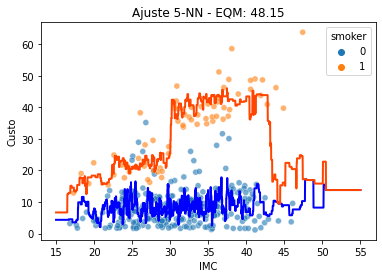

In [ ]:
knnreg1 = KNeighborsRegressor(n_neighbors = melhor_knn1_k)
knnreg1.fit(Xtreino1, ytreino1)
preditos_k1 = knnreg1.predict(Xteste1)
eqm_knn1 = mean_squared_error(yteste1, preditos_k1)

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = knnreg1.predict(c0)
d1 = knnreg1.predict(c1)

sns.scatterplot(x = Xteste1['bmi'], y = yteste1, hue =  Xteste1['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title(f'Ajuste {melhor_knn1_k}-NN - EQM: {eqm_knn1:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

####A Melhor Árvore do Cenário 2

In [ ]:
reps = 10
eqms_arvore1 = []

for i in range(1, reps + 1):
  arvore1 = DecisionTreeRegressor(max_depth = i)
  arvore1.fit(Xtreino1, ytreino1)

  preditos_arvore1 = arvore1.predict(Xteste1)
  
  eqm_arvore1 = mean_squared_error(yteste1, preditos_arvore1)
  eqms_arvore1.append(eqm_arvore1)


melhor_arvore1_depth = eqms_arvore1.index(min(eqms_arvore1))+1
melhor_arvore1_eqm = round(min(eqms_arvore1), 2)

print(f'O melhor modelo foi Profundidade {melhor_arvore1_depth} com EQM = {melhor_arvore1_eqm}')

O melhor modelo foi Profundidade 3 com EQM = 32.36


In [ ]:
eqm_reps_arvore1 = HoldoutRep1(modelo = DecisionTreeRegressor(max_depth = melhor_arvore1_depth), replicas = 100)

EQM médio: 35.06


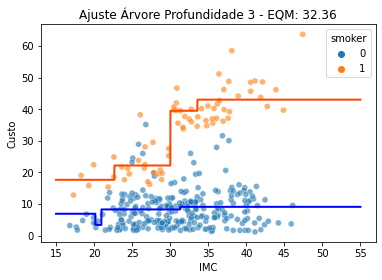

In [ ]:
arvore1 = DecisionTreeRegressor(max_depth = melhor_arvore1_depth)
arvore1.fit(Xtreino1, ytreino1)
preditos_a1 = arvore1.predict(Xteste1)
eqm_arvore1 = mean_squared_error(yteste1, preditos_a1)

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore1.predict(c0)
d1 = arvore1.predict(c1)

sns.scatterplot(x = Xteste1['bmi'], y = yteste1, hue =  Xteste1['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title(f'Ajuste Árvore Profundidade {melhor_arvore1_depth} - EQM: {eqm_arvore1:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

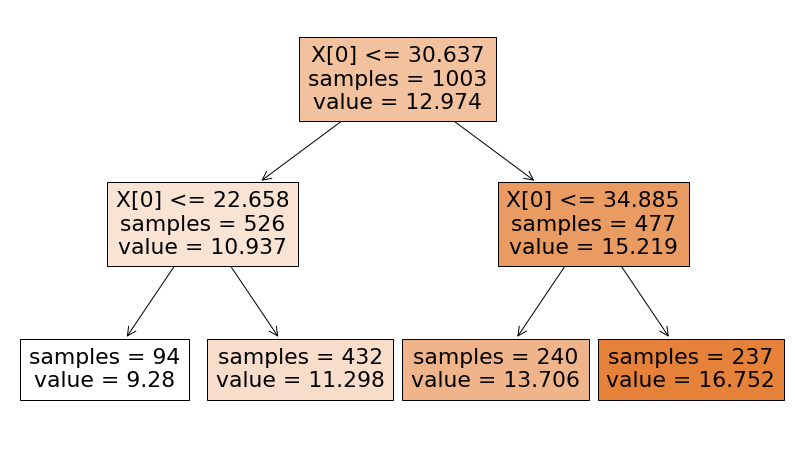

In [ ]:
plt.figure(figsize = (14, 8))
plot_tree(arvore, filled = True, proportion = False, impurity = False)
plt.show()

####Regressão Linear do Cenário 2 

In [ ]:
eqm_reps_reg1 = HoldoutRep1(modelo = LinearRegression(), replicas = 100)

EQM médio: 50.32


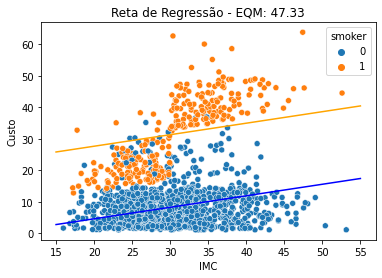

In [ ]:
reg1 = LinearRegression()
reg1.fit(Xtreino1, ytreino1)
preditos1 = reg1.predict(Xteste1)
eqm_reg1 = mean_squared_error(yteste1, preditos1)

b0 = reg1.intercept_
b1, b2 = reg1.coef_

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title(f'Reta de Regressão - EQM: {eqm_reg1:.2f}')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

##Comparando Modelos

Calculados os EQMs de todos os modelos otimizados, bem como os valores dos EQMs médios com cada ajuste escolhido, podemos então criar uma tabela de comparação e visualizar qual modelo foi capaz de fazer a melhor previsão em relação aos demais

In [ ]:
valores_eqm = {'Regressão Linear (bmi)': [np.nan, eqm_reps_reg],
               'Regressão Linear (bmi e smoker)': [np.nan, eqm_reps_reg1],
               'Árvore (bmi)' : [melhor_arvore_eqm, eqm_reps_arvore],
               'Árvore (bmi e smoker)': [melhor_arvore1_eqm, eqm_reps_arvore1],
               'KNN (bmi)': [melhor_knn_eqm, eqm_reps_knn],
               'KNN (bmi e smoker)': [melhor_knn1_eqm, eqm_reps_knn1]}

In [ ]:
resultados = pd.DataFrame(valores_eqm.values(), index = valores_eqm.keys(), columns = ['EQM Ajuste', 'EQM Médio'])
resultados.sort_values(by = 'EQM Médio')

,EQM Ajuste,EQM Médio
Árvore (bmi e smoker),32.36,35.06
KNN (bmi e smoker),48.15,47.34
Regressão Linear (bmi e smoker),NaN,50.32
KNN (bmi),157.91,142.40
Regressão Linear (bmi),NaN,143.72
Árvore (bmi),160.59,143.91


# Considerações Finais

Ao fim deste projeto, fomos capazes de prever os custos de futuros clientes de seguro utilizando os três modelos de regressão já vistos: a Regressão Linear, o KNN e a Árvore de Decisão. Buscamos a otimização do KNN e da Árvore por meio da procura de um parâmetro que retornasse o menor EQM. Devemos obervar, porém, que os modelos de machine learning possuem diversos parâmetros que podem ser utilizados na busca por sua otimização. Tal prática será observada em um projeto posterior